02 물고기의 무게를 다중회귀분석으로 분석하고자 한다. 데이터의 구성 은 아래 표와 같다. Weight를 Y변수로 Length, Height, Width,  FinSize를 X변수로 하는 다중회귀분석을 수행하고 아래에 답하시오.

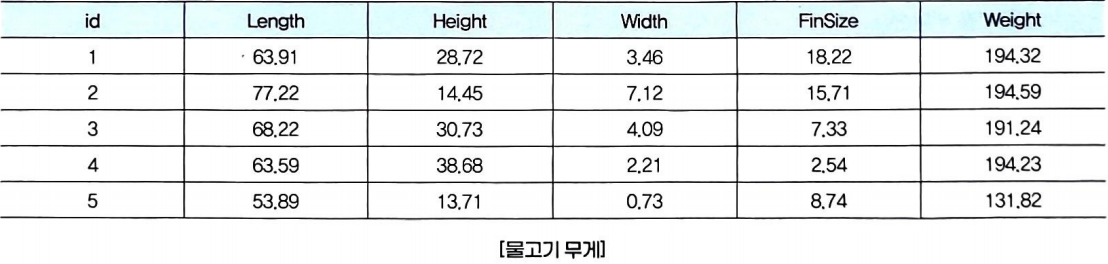

(1) Length의 회귀계수를 구하고, 소수 둘째 자리로 반올림하시오.

(2) Height의 회귀계수의 P-value를 구하시오.

(3) Width의 회귀계수가 P-value 0.05를 기준으로 했을 때 통계적으로 의미가 있는지를 평가하시오. 의미가 있는 경우엔 'Y', 없는 경우엔 'N'을 출력하시오.

In [13]:
# (1)번 문제 풀이
# library 임포트
import pandas as pd
import statsmodels.api as sm

file = '/content/06.03.02-fish_weight_data.csv'
df = pd.read_csv(file)
# print(df.head())

# 다중회귀 분석 모델을 만들기 위해 독립변수(X)와 종속변수(Y)를 설정하고 데이터를 분리한다.
X_cols = ['Length', 'Height', 'Width', 'FinSize']
Y_cols = ['Weight']

# 독립변수, 종속변수 데이터 분리
X = df[X_cols]
y = df[Y_cols]

# print(y.head())
# 다중회귀 분석 모델은 statsmodels.api를 사용한다. 문제에서 요구하는 바는 다중 회귀모델을 이용하여
# 예측하는 것이 아니라 통계 분석을 통해서 모델 회귀계수의 적합성을 평가하는 것이다.
# 따라서, sklearn은 사용하지 않는다.

# 다중회귀 분석 수행
X = sm.add_constant(X)   # 상수항 추가
model = sm.OLS(y, X).fit() # 분석 수행 - 모델 생성

# print(model)
# 생성한 다중회귀 분석 모델에서 Length의 회귀계수를 구하여 print로 출력한다.
# 회귀계수를 구하기 위해서는 params 함수를 이용한다.

# Length 회귀 계수 구하기 Length_coef
length_coef = model.params['Length']
length_coef = round(length_coef, 2)
print(length_coef)
#(1)의 정답 : 2.04


# (2) Height의 회귀계수의 P-value를 구하시오.
# Height 변수의 p-value를 구한다. 모델에서 pvalues를 호출하여 구할 수 있다.
# height 계수의 p-value 구하기
height_pvalue = model.pvalues['Height']
print(height_pvalue)
# (2)번의 정답 : 2.0296276104742017e-51

# (3) Width의 회귀계수가 P-value 0.05를 기준으로 했을 때 통계적으로 의미가 있는지를
# 평가하시오. 의미가 있는 경우엔 'Y', 없는 경우엔 'N'을 출력하시오.

# Width 회귀계수가 유의미한지 검증한다. 유의미 여부를 추출하기 위해서는 Width 변수의
# p-value를 구해야 한다. 앞서 사용했던 pvalues를 호출하여 Width 변수의 p-value를 구하고
# 이 값이 유의수준 0.05를 하회하는지 상회하는지 체크를 해야한다.
# 본 문제에서는 0.05를 하회하므로 Width 변수의 회귀계수는 유의미하다고 할 수 있다.
# width 회귀계수의 유의미 여부 추출하기
width_coef = model.params['Width']
width_pvalue = model.pvalues['Width']
# print(width_pvalue)

result = 'N'

if width_pvalue < 0.05:
    result = 'Y'

print(result)
# (3)번 문제의 정답은 Y 가 된다.



2.04
2.0296276104742017e-51
Y
